## Set up dependencies

In [1]:
try:
    import google.colab
    import subprocess
    import os.path
    p = subprocess.run(['git', 'rev-parse', '--is-inside-work-tree'], stdout=subprocess.PIPE, universal_newlines=True)
    if p.stdout == 'true\n':
        !git pull
    else:
        if not os.path.isdir('city_dsp_ap'):
            !git clone --depth 1 -q https://github.com/tweyde/city_dsp_ap.git
        %cd city_dsp_ap
except:
    %cd city_dsp_ap

/content/city_dsp_ap


In [2]:
import numpy as np
from scipy import fft, signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.util import random_noise
from IPython.display import Audio, display

In [3]:
import scipy as sp
sp.__version__

'1.11.4'

## Controllable delay line (UG) or filter (PG)

You will need to create a function that applies the desired effect to any input signal, where the effect can be dynamically modified by a control signal. The functions only need to be implemented for offline use, so you don't need to be handle input buffers of arbitrary sizes like in lab 6. It suffices to use a single for loop to run over all samples of the input and control signals, and create the output sample-by-sample.


In [4]:
%ls audio/*.wav

audio/20-16000HzExp5sec.wav  audio/carrier.wav*  audio/rockA.wav
audio/20-16000HzLin5sec.wav  audio/clavinet.wav  audio/rockB.wav


#### UG

Program a controllable delay line. Mix the output with the original input to create a flanging effect. Use the control signal to vary the amount of delay between zero and a maximum value (1 millisecond would be a good default for this, use the samplerate to calculate how much samples this is).

The control signal should be a sine of 0.2Hz (you can experiment with other frequencies). Create one of the required length yourself. Any signal should work as input signal. You can learn how to [upload your own files](https://colab.research.google.com/notebooks/io.ipynb) into Google Colab, but the easiest is to use one the 'clavinet.wav' file available in the `audio` directory. If you're loading a stereo file, it is allowed to mix it down into a single mono channel before passing it to the effect to simplify processing.

#### PG
Program a controllable FIR filter, i.e. a filter that changes its characteristics over time in response to a control signal. Apply the filter to the signal by implementing a convolution with the filter coefficients in a loop over the samples, just like in lab 7. In order to make the filter respond to the control signal, directly manipulate the filter characteristics in the filter design function [`firls`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html) and call it for every iteration.

The control signal should be the power of the audio signal (you can experiment with other frequencies), which needs to be low-pass filtered for good results (why is that?). Any signal should work as input signal. You can learn how to [upload your own files](https://colab.research.google.com/notebooks/io.ipynb) into Google Colab, but the easiest is to use one the 'clavinet.wav' file available in the `audio` directory. If you're loading a stereo file, it is allowed to mix it down into a single mono channel before passing it to the effect to simplify processing.


In [5]:
# write your code here

# Define function of delay with the following parameter
## input_file: file of any signal as input
def delay(input_file):
    # Create input signal
    input_rate, input_signal = wavfile.read(input_file)

    # Case 1: mono input file
    if len(input_signal.shape) == 1:
        print('Mono input file')

        # Create input audio
        input_audio = Audio(input_signal, rate=input_rate)

        # Display input audio and plot input signal
        print('Input audio and signal:')
        display(input_audio)
        plt.figure()
        plt.plot(input_signal) # orginal signal instead of input signal in case of transformation of signal from stereo to mono
        plt.show()

        # Create sine wave control signal and audio
        #control_frequency = 440 # Uncomment this line to try control frequency 440, which can be listened
        #control_frequency = 0.5 # Uncomment this line to try control frequency 0.5
        control_frequency = 0.2 # Comment out this line to try another control frequency
        duration = len(input_signal) / input_rate
        timepoint = np.arange(duration * input_rate) / input_rate
        control_signal = np.sin(2 * np.pi * control_frequency * timepoint)
        control_audio = Audio(control_signal, rate=input_rate)

        # Display control audio and plot control signal
        print('Control audio and signal:')
        display(control_audio)
        plt.figure()
        plt.plot(control_signal)
        plt.show()

        # Calculate maximum delay samples
        max_delay = 1
        max_delay_samples = int(max_delay * input_rate / 1000)

        # Create output signal
        output_signal = np.zeros_like(input_signal)

        # Apply delay and mix with original input
        for i in range(len(input_signal)):
            delay_samples = int((control_signal[i] + 1) * max_delay_samples / 2)
            if i < delay_samples:
                output_signal[i] = input_signal[i]
            else:
                output_signal[i] = input_signal[i] + input_signal[i - delay_samples]

        # Create output audio
        output_audio = Audio(output_signal, rate=input_rate)

        # Display output audio and plot output signal
        print('Output audio and signal:')
        display(output_audio)
        plt.figure()
        plt.plot(output_signal)
        plt.show()

    # Otherwise transform input signal from stereo to mono and create input audio
    #original_rate, original_signal = wavfile.read(input_file)
    # Case 2: stereo input file
    else:
        print('Stereo input file')

        # Transform stereo signal to mono signal
        transformed_input_signal = input_signal.T

        # Create input audio
        input_audio = Audio(transformed_input_signal, rate=input_rate)

        # Display input audio and plot input signal
        print('Input audio and signal:')
        display(input_audio)
        plt.figure()
        plt.plot(input_signal) # original input signal instead of trasformed input signal
        plt.show()

        # Create sine wave control signal and audio
        #control_frequency = 440 # Uncomment this line to try control frequency 440, which can be listened
        #control_frequency = 0.5  # Uncomment this line to try control frequency 0.5
        control_frequency = 0.2 # Comment out this line to try another control frequency
        duration = len(input_signal) / input_rate
        timepoint = np.arange(duration * input_rate) / input_rate
        control_signal = np.sin(2 * np.pi * control_frequency * timepoint)
        control_audio = Audio(control_signal, rate=input_rate)

        # Display control audio and plot control signal
        print('Control audio and signal:')
        display(control_audio)
        plt.figure()
        plt.plot(control_signal)
        plt.show()

        # Calculate maximum delay samples
        max_delay = 1
        max_delay_samples = int(max_delay * input_rate / 1000)

        # Create output signal
        output_signal = np.zeros_like(input_signal)

        # Apply delay and mix with original input
        for i in range(len(input_signal)):
            delay_samples = int((control_signal[i] + 1) * max_delay_samples / 2)
            if i < delay_samples:
                output_signal[i] = input_signal[i]
            else:
                output_signal[i] = input_signal[i] + input_signal[i - delay_samples]

        # Transform stereo signal to mono signal
        transformed_output_signal = output_signal.T

        # Create output audio
        output_audio = Audio(transformed_output_signal, rate=input_rate)

        # Display output audio and plot output signal
        print('Output audio and signal:')
        display(output_audio)
        plt.figure()
        plt.plot(output_signal)
        plt.show()

Mono input file
Input audio and signal:


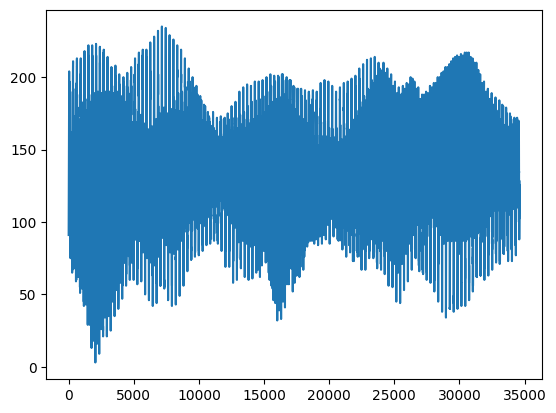

Control audio and signal:


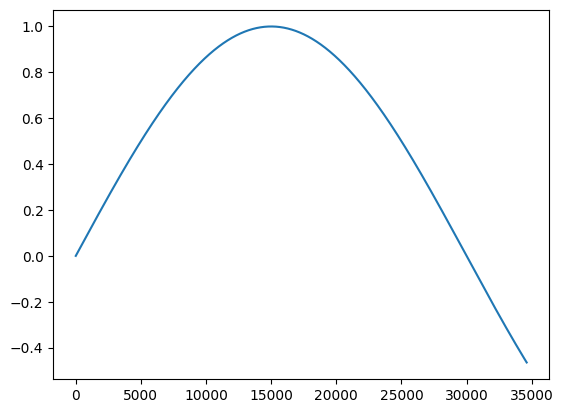

Output audio and signal:


<ipython-input-5-2a5162a9c463>:52: RuntimeWarning: overflow encountered in scalar add
  output_signal[i] = input_signal[i] + input_signal[i - delay_samples]


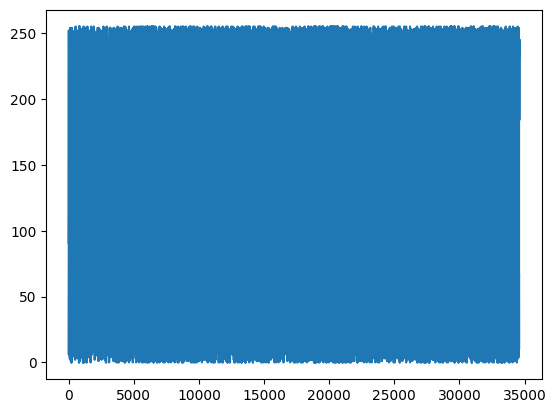

In [6]:
# Use mono file as input
delay('audio/carrier.wav')

Stereo input file
Input audio and signal:


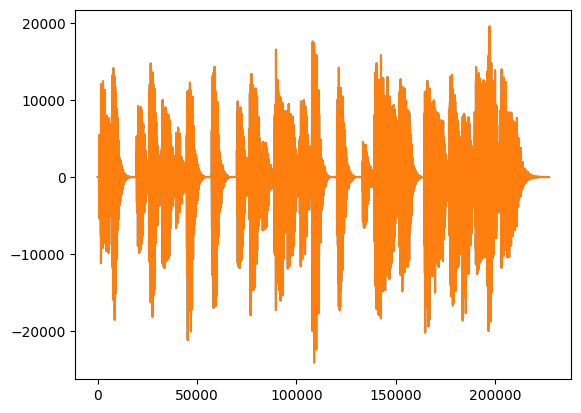

Control audio and signal:


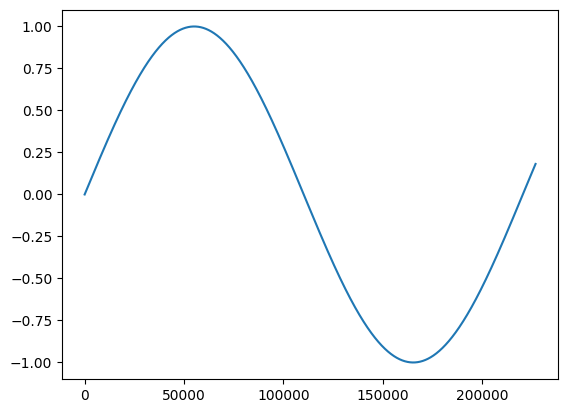

Output audio and signal:


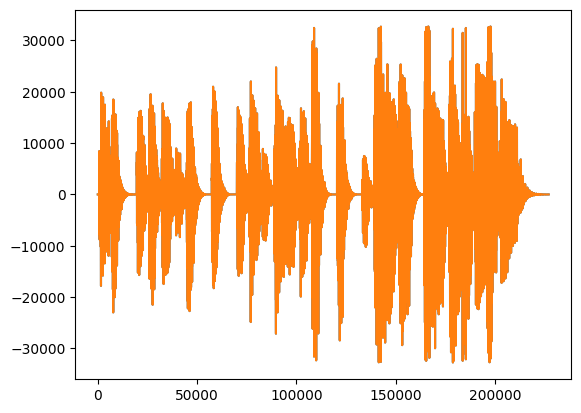

In [7]:
# Use stereo file as input
delay('audio/clavinet.wav')

## Digit recognition (UG & PG)

In this part, you're going to use images of handwritten digits ranging from 0 to 9. They are split in a training set and a test set and stored as text files in `data/digits-training.txt` and `data/digits-test.txt`.

In [8]:
%ls data/digits-*.txt

data/digits-test.txt*  data/digits-training.txt*


In [9]:
from itertools import islice
import re

def read_digit_pixels_and_labels(path):
    with open(path) as f:
        header = list(islice(f, 21))
        pixel_height = [int(x[1]) for x in map(lambda r: re.match('entheight = (\d+)', r), header) if x][0]
        num_digits = [int(x[1]) for x in map(lambda r: re.match('ntot = (\d+)', r), header) if x][0]
        digit_pixels = []
        labels = []
        for _ in range(num_digits):
            chunk = list(islice(f, pixel_height+1))
            digit_pixels.append(np.loadtxt(chunk[:-1]))
            labels.append(int(chunk[-1]))
    return digit_pixels, labels

Since the text files have a custom format, a loader function `read_digit_pixels_and_labels` is provided.

In [10]:
training_digits, training_labels = read_digit_pixels_and_labels('data/digits-training.txt')
test_digits, test_labels = read_digit_pixels_and_labels('data/digits-test.txt')

In [11]:
len(training_digits), len(training_labels), len(test_digits), len(test_labels)

(1934, 1934, 943, 943)

All digits and their associated labels have now been read into lists, so we can use list indexing to access them and, for instance, display them as below.

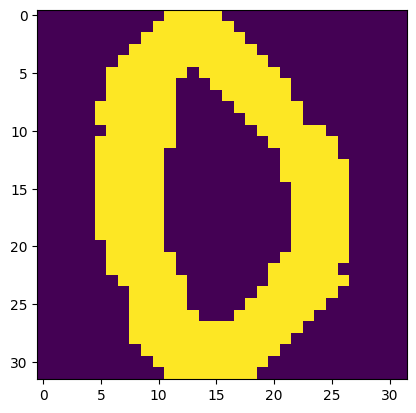

Image of digit 0


In [12]:
index = 1
plt.figure()
plt.imshow(training_digits[index])
plt.show()
print('Image of digit {}'.format(training_labels[index]))

Using this data, your task is to:

1. Create a function for comparing each test image with the collection of training images, using the correlation with each training image without offset (i.e. calculate the sum of the element-wise multiplied images).
2. Estimate the most likely label for each test image by matching with the training image that has maximal correlation.
3. Estimate the accuracy of your system, as a fraction of the correctly estimated test labels over the total number of test images.
4. Use the two-dimensional correlation function [`signal.correlate2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) to find the best match over all image offsets. For efficiency you can use a subset of the training images, or calculate an average of the training images.
5. Implement variants of the digit recognition system, e.g.
    - use the negatives of the training and test images instead of the positive images
    - use images that are slightly rotated in your training set (using [`rotate`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rotate) from the `scikit-image.transform` library)
    - use images with some noise added in your training set (using [`random_noise`](https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise) from the `scikit-image.util` library)
6. Report the accuracy of the new system and compare with the accuracy of the previous systems.
7. In the written report, discuss and reason about the different performances of your classifiers.

In [13]:
# write your code here

# Import necessary modules
from scipy.signal import correlate2d
from random import randint
from skimage.util import invert
from skimage.transform import rotate
from skimage.util import random_noise

In [14]:
# Define function of digit recognition with the following parameters
## train_length: length of whole train set or its subset
## train_digit: all digits of whole train set or its subset
## train_label: all labels of whole train set or its subset
## test_length: length of whole test set or its subset
## test_digit: all digits of whole test set or its subset
## test_label: all labels of whole test set or its subset
## mode: either 'without offset' (sum of the element-wise multiplied images) or 'with offset' (2D correlation)

def digit_recognition(train_length, train_digit, train_label,
                test_length, test_digit, test_label,
                mode):
    # Create list of predicted labels
    list_pred = []

    for test in test_digit:
        # Create variables for tracking
        max_corr = 0
        max_corr_index = 0
        current_train_index = 0

        for train in train_digit:
            # Check digit recognition mode,
            # compute correlation of current test and train digit,
            # and find the largest between current and recorded maximum correlation
            if mode == 'without offset':
                corr = np.sum( np.abs( np.multiply(test, train) ) )
                if corr > max_corr:
                    max_corr = corr
                    max_corr_index = current_train_index

            elif mode == 'with offset':
                corr = np.max( np.abs( correlate2d(test, train, mode='same') ) )
                if corr > max_corr:
                    max_corr = corr
                    max_corr_index = current_train_index

            else:
                print('Invalid mode')

            current_train_index += 1

        # Predict label of current test digit and add it to list of predicted labels
        pred = train_label[max_corr_index]
        list_pred.append(pred)

    # Compute number of correct prediction
    correct_count = 0
    for i in range(test_length):
        if list_pred[i] == test_label[i]:
            correct_count += 1
    # Compute and print accuracy
    accuracy = correct_count / test_length
    print('Accuracy =', accuracy)

    # Show 5 random test digits with actual and predicted labels
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 1), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(5):
        random_index = randint(0, test_length - 1)
        ax[i].imshow(test_digit[random_index])
        ax[i].set_title(f'Label: {test_label[random_index]}\n Prediction: {list_pred[random_index]}')
        ax[i].set_axis_off()
    fig.tight_layout
    plt.show()

In [15]:
# Define function to initially show 5 random digits with actual labels, when no prediction has been made yet, with the following parameters:
## length: length of digits or labels
## digit: list of digits
## label: list of labels
def show_5_random_digits(length, digit, label):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 1), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(5):
        random_index = randint(0, length - 1)
        ax[i].imshow(digit[random_index])
        ax[i].set_title(f'Label: {label[random_index]}')
        ax[i].set_axis_off()
    fig.tight_layout
    plt.show()

5 random normal train subset digits with actual labels:


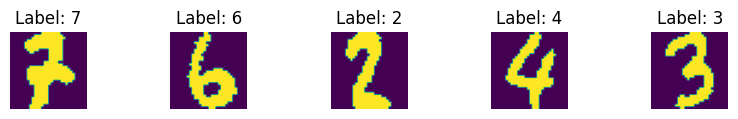


5 random normal test subset digits with actual labels:


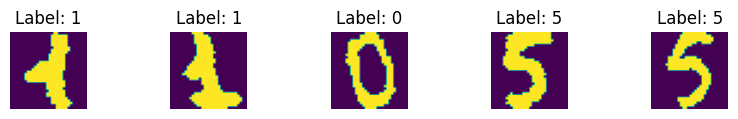


Result of correlation WITHOUT offset on normal train subset and normal test subset:
Accuracy = 0.9


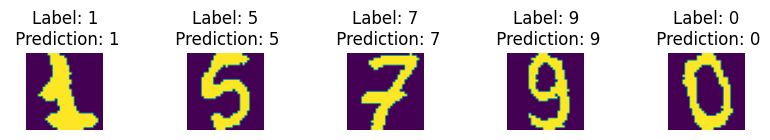


Result of correlation WITH offset on normal train subset and normal test subset:
Accuracy = 0.95


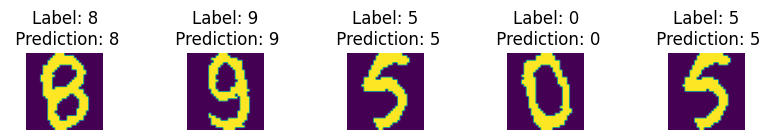

In [16]:
# NORMAL TRAIN SUBSET AND NORMAL TEST SUBSET

# Create normal train subset
normal_train_subset_length = 500
normal_train_subset_digit = training_digits[ 0 : normal_train_subset_length ]
normal_train_subset_label = training_labels[ 0 : normal_train_subset_length ]

# Create normal test subset
normal_test_subset_length = 20
normal_test_subset_digit = test_digits[ 0 : normal_test_subset_length ]
normal_test_subset_label = test_labels[ 0 : normal_test_subset_length ]

# Show 5 random normal train subset digits with actual labels
print('5 random normal train subset digits with actual labels:')
show_5_random_digits(normal_train_subset_length, normal_train_subset_digit, normal_train_subset_label)
print()

# Show 5 random normal test subset digits with actual labels
print('5 random normal test subset digits with actual labels:')
show_5_random_digits(normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label)
print()

# Result of correlation WITHOUT offset on normal train subset and normal test subset
print('Result of correlation WITHOUT offset on normal train subset and normal test subset:')
digit_recognition(normal_train_subset_length, normal_train_subset_digit, normal_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'without offset')
print()

# Result of correlation WITH offset on normal train subset and normal test subset
print('Result of correlation WITH offset on normal train subset and normal test subset:')
digit_recognition(normal_train_subset_length, normal_train_subset_digit, normal_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'with offset')

5 random negative train subset digits with actual labels:


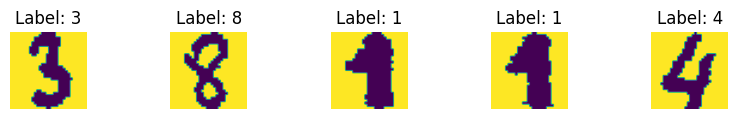


5 random negative test subset digits with actual labels:


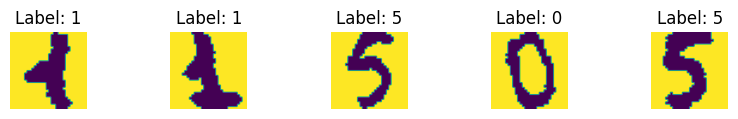


Result of correlation WITHOUT offset on negative train subset and negative test subset:
Accuracy = 0.75


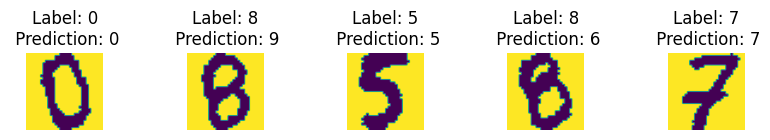


Result of correlation WITH offset on negative train subset and negative test subset:
Accuracy = 0.75


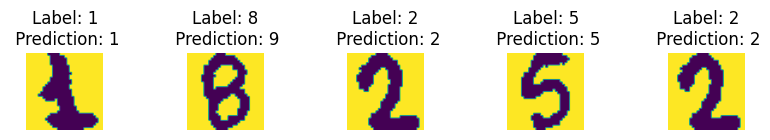

In [17]:
# NEGATIVE TRAIN SUBSET AND NEGATIVE TEST SUBSET

# Define function of image inversion with the following parameter:
## list_image: list of images
def invert_image(list_image):
    list_inverted_image = []
    for image in list_image:
        inverted_image = invert(image)
        list_inverted_image.append(inverted_image)
    return list_inverted_image

# Create whole negative train and test sets
negative_training_digits = invert_image(training_digits)
negative_training_labels = training_labels
negative_test_digits = invert_image(test_digits)
negative_test_labels = test_labels

# Create negative train subset
negative_train_subset_length = 500
negative_train_subset_digit = negative_training_digits[ 0 : negative_train_subset_length ]
negative_train_subset_label = negative_training_labels[ 0 : negative_train_subset_length ]

# Create negative test subset
negative_test_subset_length = 20
negative_test_subset_digit = negative_test_digits[ 0 : negative_test_subset_length ]
negative_test_subset_label = negative_test_labels[ 0 : negative_test_subset_length ]

# Show 5 random negative train subset digits with actual labels
print('5 random negative train subset digits with actual labels:')
show_5_random_digits(negative_train_subset_length, negative_train_subset_digit, negative_train_subset_label)
print()

# Show 5 random negative test subset digits with actual labels
print('5 random negative test subset digits with actual labels:')
show_5_random_digits(negative_test_subset_length, negative_test_subset_digit, negative_test_subset_label)
print()

# Result of correlation WITHOUT offset on negative train subset and negative test subset
print('Result of correlation WITHOUT offset on negative train subset and negative test subset:')
digit_recognition(negative_train_subset_length, negative_train_subset_digit, negative_train_subset_label,
                  negative_test_subset_length, negative_test_subset_digit, negative_test_subset_label,
                  'without offset')
print()

# Result of correlation WITH offset on negative train subset and negative test subset
print('Result of correlation WITH offset on negative train subset and negative test subset:')
digit_recognition(negative_train_subset_length, negative_train_subset_digit, negative_train_subset_label,
                  negative_test_subset_length, negative_test_subset_digit, negative_test_subset_label,
                  'with offset')

5 random rotated train subset digits with actual labels:


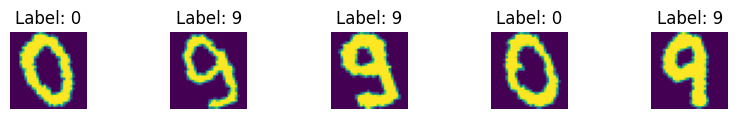


5 random normal test subset digits with actual labels:


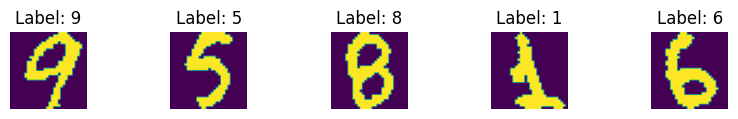


Result of correlation WITHOUT offset on rotated train subset and normal test subset:
Accuracy = 0.5


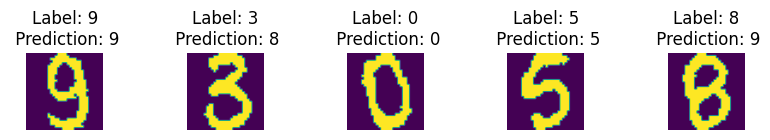


Result of correlation WITH offset on rotated train subset and normal test subset:
Accuracy = 0.6


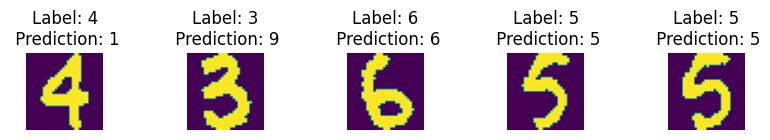

In [18]:
# ROTATED TRAIN SUBSET AND NORMAL TEST SUBSET

# Define function of image rotation with the following parameter:
## list_image: list of images
def rotate_image(list_image):
    list_rotated_image = []
    for image in list_image:
        rotated_image = rotate(image, 20)
        list_rotated_image.append(rotated_image)
    return list_rotated_image

# Create whole rotated train set only
## (whole normal test set can be reused with
## test_digits and test_label
## )
rotated_training_digits = rotate_image(training_digits)
rotated_training_labels = training_labels

# Create rotated train subset only
## (normal test subset can be reused with
## normal_subset_test_length, normal_subset_test_digit, normal_subset_test_label
## )
rotated_train_subset_length = 500
rotated_train_subset_digit = rotated_training_digits[ 0 : rotated_train_subset_length ]
rotated_train_subset_label = rotated_training_labels[ 0 : rotated_train_subset_length ]

# Show 5 random rotated train subset digits with actual labels
print('5 random rotated train subset digits with actual labels:')
show_5_random_digits(rotated_train_subset_length, rotated_train_subset_digit, rotated_train_subset_label)
print()

# Show 5 random normal test subset digits with actual labels
print('5 random normal test subset digits with actual labels:')
show_5_random_digits(normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label)
print()

# Result of correlation WITHOUT offset on rotated train subset and normal test subset
print('Result of correlation WITHOUT offset on rotated train subset and normal test subset:')
digit_recognition(rotated_train_subset_length, rotated_train_subset_digit, rotated_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'without offset')
print()

# Result of correlation WITH offset on rotated train subset and normal test subset
print('Result of correlation WITH offset on rotated train subset and normal test subset:')
digit_recognition(rotated_train_subset_length, rotated_train_subset_digit, rotated_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'with offset')

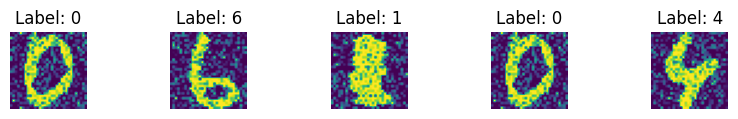


5 random normal test subset digits with actual labels:


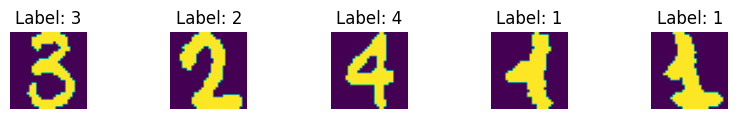


Result of correlation WITHOUT offset on noisy train subset and normal test subset:
Accuracy = 0.85


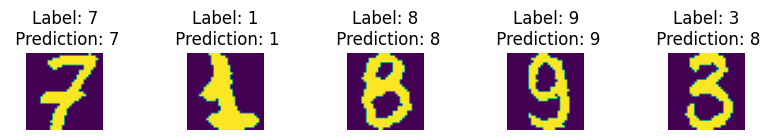


Result of correlation WITH offset on noisy train subset and normal test subset:
Accuracy = 0.9


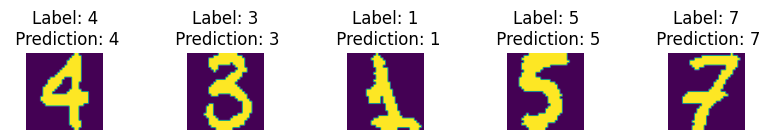

In [19]:
# NOISY TRAIN SET AND NORMAL TEST SET

# Define function of image noise addition with the following parameter:
## list_image: list of images
def add_image_random_noise(list_image):
    list_nosiy_image = []
    for image in list_image:
        nosiy_image = random_noise(image, mode='gaussian', mean=0, var=0.1)
        list_nosiy_image.append(nosiy_image)
    return list_nosiy_image

# Create whole noisy train set only
## (whole normal test set can be reused with
## test_digits and test_label
## )
noisy_training_digits = add_image_random_noise(training_digits)
noisy_training_labels = training_labels

# Create noisy train subset only
## (normal test subset can be reused with
## normal_subset_test_length, normal_subset_test_digit, normal_subset_test_label
## )
noisy_train_subset_length = 500
noisy_train_subset_digit = noisy_training_digits[ 0 : noisy_train_subset_length ]
noisy_train_subset_label = noisy_training_labels[ 0 : noisy_train_subset_length ]

# Show 5 random noisy train subset digits with actual labels
show_5_random_digits(noisy_train_subset_length, noisy_train_subset_digit, noisy_train_subset_label)
print()

# Show 5 random normal test subset digits with actual labels
print('5 random normal test subset digits with actual labels:')
show_5_random_digits(normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label)
print()

# Result of correlation WITHOUT offset on noisy train subset and normal test subset
print('Result of correlation WITHOUT offset on noisy train subset and normal test subset:')
digit_recognition(noisy_train_subset_length, noisy_train_subset_digit, noisy_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'without offset')
print()

# Result of correlation WITH offset on noisy train subset and normal test subset
print('Result of correlation WITH offset on noisy train subset and normal test subset:')
digit_recognition(noisy_train_subset_length, noisy_train_subset_digit, noisy_train_subset_label,
                  normal_test_subset_length, normal_test_subset_digit, normal_test_subset_label,
                  'with offset')

## Time series prediction with financial data (UG & PG)

In this part, you're going to use long term US stock market data (monthly indices, dividends, earnings, etc. since 1871). Information about the data provenance and references can be found at http://www.econ.yale.edu/~shiller/data.htm (especially the 2nd paragraph). The data is available in the file `data/financial_data.csv`.

It is stored as comma-separated numerical values, with a header containing column names. Therefore we can use [`np.genfromtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) to read it.

In [20]:
'''financial = np.genfromtxt('data/financial_data.csv', delimiter=',', skip_header=2, names=True)'''

"financial = np.genfromtxt('data/financial_data.csv', delimiter=',', skip_header=2, names=True)"

The result is a structured array, which means that we can access each of the columns in the table by its name. The list of all colums can be found below.

In [21]:
'''financial.dtype.names'''

'financial.dtype.names'

You can access the columns using their names between square brackets, like you would for a dictionary. It's advised to store the columns you need in helper variables, to avoid long statements resulting from the long column names.

In [22]:
'''date = financial['Date']
real_price = financial['Real_Price']'''

"date = financial['Date']\nreal_price = financial['Real_Price']"

Now you can easily use the data, for instance to plot it.

In [23]:
'''plt.figure()
plt.plot(date, real_price)
plt.title('Evolution of Real Price over time')
plt.show()'''

"plt.figure()\nplt.plot(date, real_price)\nplt.title('Evolution of Real Price over time')\nplt.show()"

Using this data, your task is to:

1. Look for long term trends on a linear and log scale and de-trend the data first.
2. Calculate the FFT of the signal of interest, to estimate possible periodicities. You can use a window to avoid spectral leaking.
3. Refine your analysis by adjusting the size of the dataset (e.g. if you model annual patterns, make sure your dataset size is a multiple of 12).

In [24]:
# write your code here